## Clustering Case Study 
**Problem Statement**<br><br>Categorize the countries from the given socio-economic and health factors that determines the overall development of the country and Identify the countries that are in the direst need of aid.


# 1. Reading and Understanding the data 

In [1]:
# lading imporant libraries
import pandas as pd 
import numpy as np
# supress warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# importing libraries for visulatisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importing library for rescaling
from sklearn.preprocessing import StandardScaler

In [4]:
# importing required libraries for Hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [5]:
# importing required libraries for Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
# importing required libraries for Hierarchical
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [7]:
# loading counrty dataset
df_Country = pd.read_csv('Country-data.csv')

In [8]:
# checking few rows of the loaded dataset
df_Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
# checking the number of rows and column in the dataframe
df_Country.shape

(167, 10)

In [10]:
df_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# 2. Data Cleaning

## Data Quality check

**Observations:**<br>
- columns: exports , health and imports are given as percentage of GDP per capita**
- so converting the values of these columns to their absolute values

In [11]:
# converting exports to it's absolute value
df_Country['exports'] = round((df_Country['exports'] * df_Country['gdpp']) /100,2)

In [12]:
# converting exports to it's absolute value
df_Country['health'] = round((df_Country['health'] * df_Country['gdpp']) /100,2)

In [13]:
# converting exports to it's absolute value
df_Country['imports'] = round((df_Country['imports'] * df_Country['gdpp']) /100,2)

In [14]:
# chechking the changes in dataframe
df_Country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.30,1648.00,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.76,141.68,1458.66,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.20,4530.87,10847.10,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.70,5159.00,22418.20,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.12,343.39,1208.88,16000,13.800,69.1,1.92,5840


## Checking the missing values and formats of all columns

In [15]:
# chechking column-wise summary 
df_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


  **Observations :**<br>
 - There are no missing values 
 - All columns seems to have correct formats

## Checking Outliers

In [16]:
# checking statistical summary
df_Country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [17]:
# checking column names
df_Country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [18]:
# taking numeric columns in variable
num_Cols =df_Country.describe().columns
num_Cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [19]:
# box plots for checking outliers
def plot_box(col):
    plt.figure(figsize=(6,6))
    plt.title(col)
    sns.boxplot(col,data=df_Country)
    plt.show()
    return

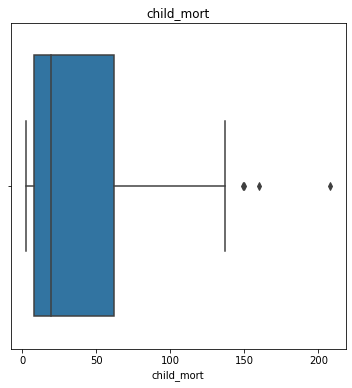

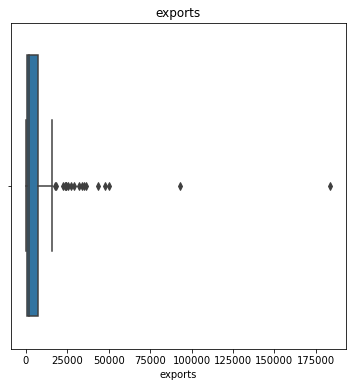

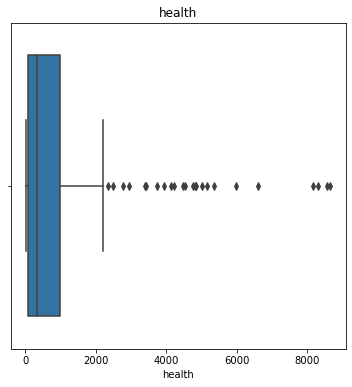

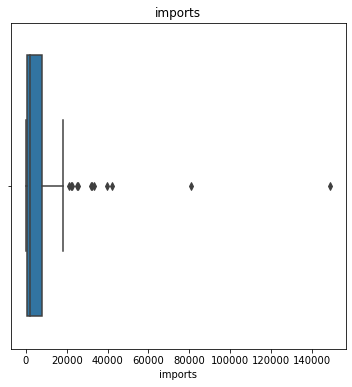

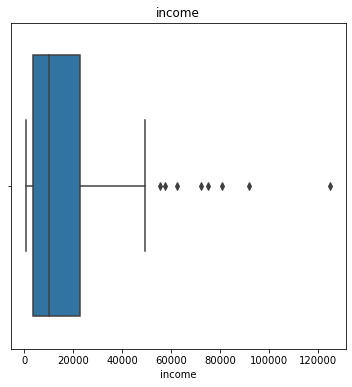

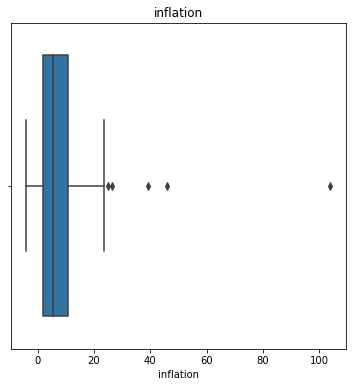

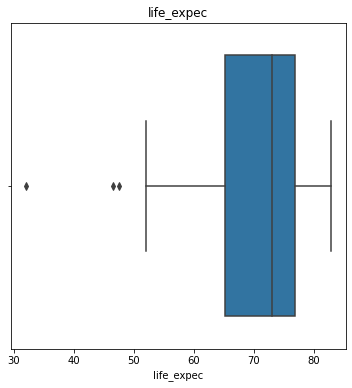

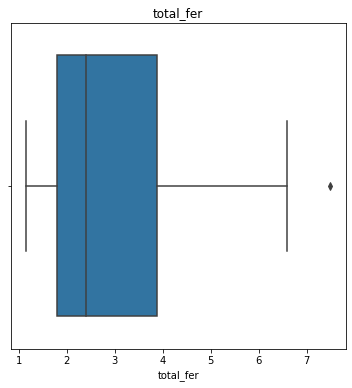

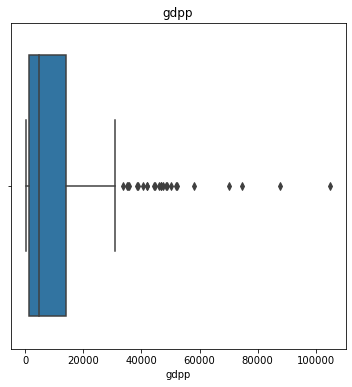

In [20]:
# plotting box plot for all numeric columns
for col in num_Cols:
    plot_box(col)

**Observations :**
- We can observe outliers above maximum in columns child_mort,exports,health,imports,income,inflation,total_fer and gdpp .
- We can also observe outliers below minimum in column life_expec

## Outliers Treatment

**Conclusions:**
- For child_mort column as countries having higher rate of death of child below age 5,might be the countries in direst need of funding so we are not removing outliers present above maximum for this column.
- For countries with high inflation may lead to low income and gdpp and might be the country in need of funding so we are not removing outliers present above maximum for inflation column.
- For column life_expec as countries having very low life expectancy of a new born child might be the countries in direst need of funding so we are not removing outliers present below minimum for this column. 
- For columns exports,health,imports,income and gdpp we are capping the outliers to maximum as these are the countries having high income and gdpp so they might be self-sufficient for improving it's health and may not require funds.   

In [21]:
# capping outliers present above maximum for columns exports,health,imports,income and gdpp.
outlier_Cols = ['exports','health','imports','income','gdpp']

# function for removing outliers
def remove_Out(col):
    q3 = df_Country[col].quantile(0.95)
    df_Country[col][df_Country[col] >= q3] = q3
    
for col in outlier_Cols:
    remove_Out(col)

**Obsevations:**
- As many outliers were not beign treated with soft capping we have used hard capping for outlier treatment.

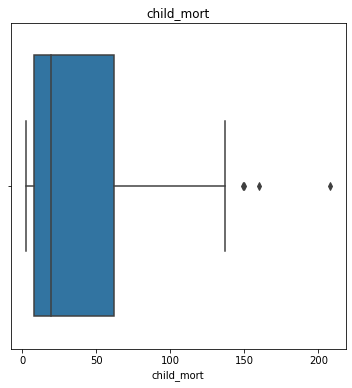

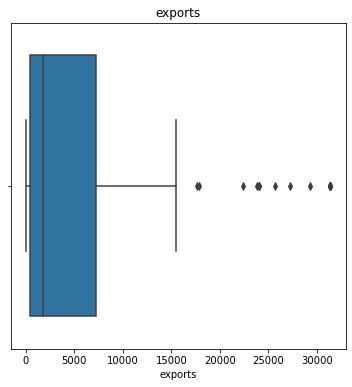

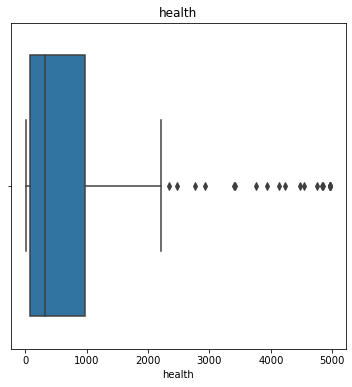

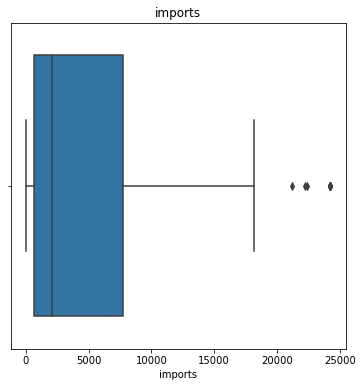

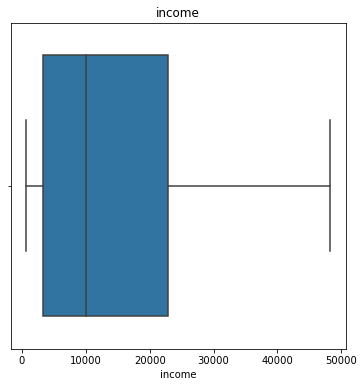

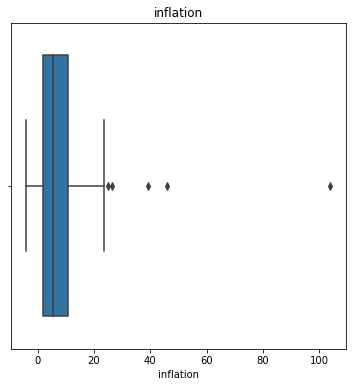

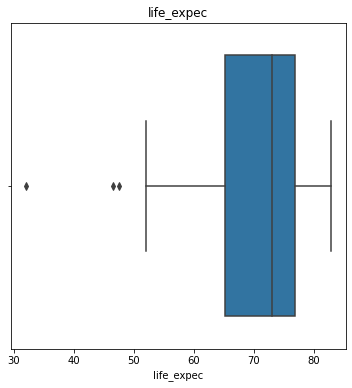

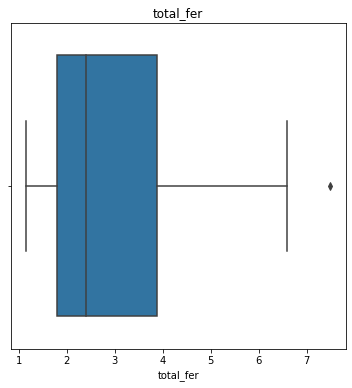

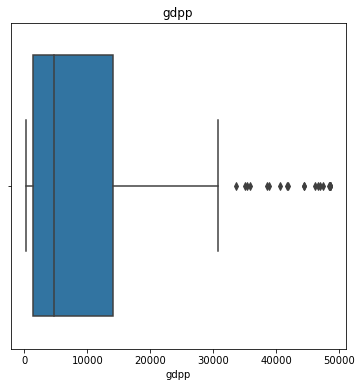

In [22]:
# plotting box plot for all numeric columns to check if ouliers are removed
for col in num_Cols:
    plot_box(col)

# 3. Data Analysis

## Univariate Analysis

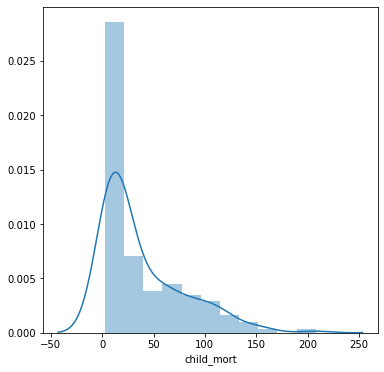

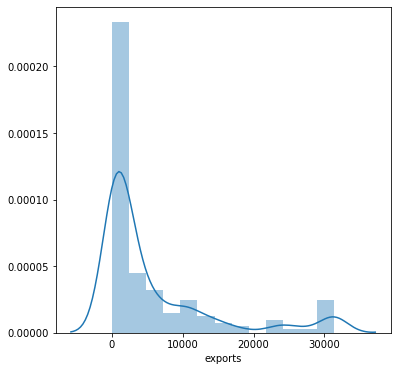

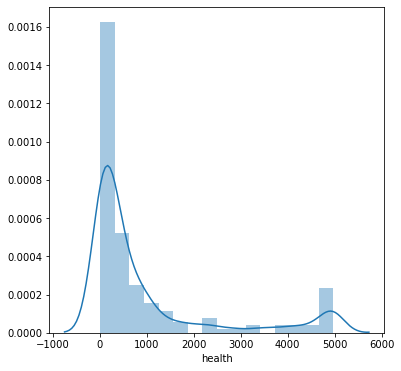

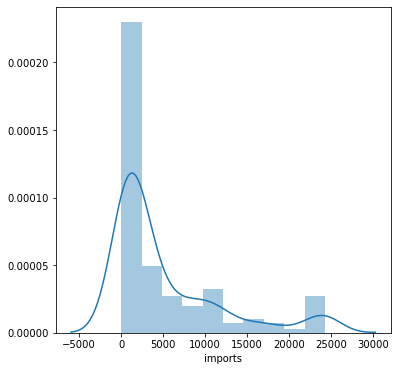

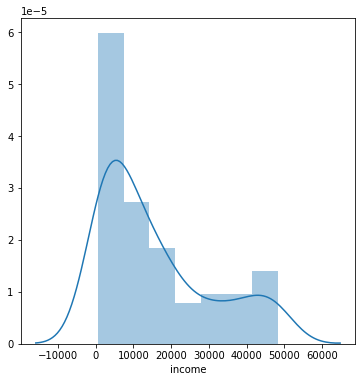

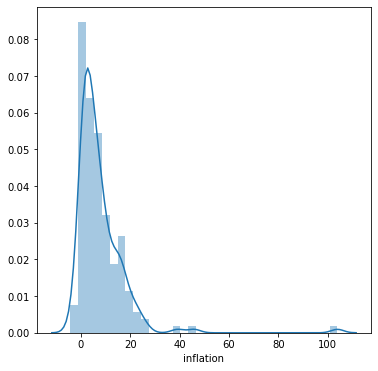

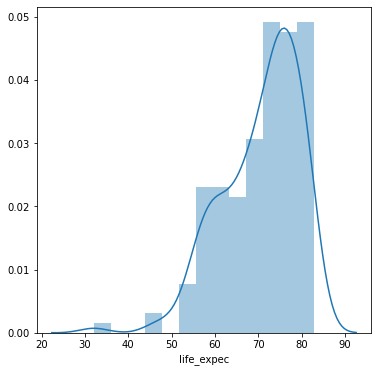

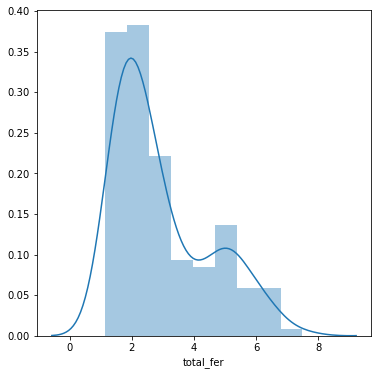

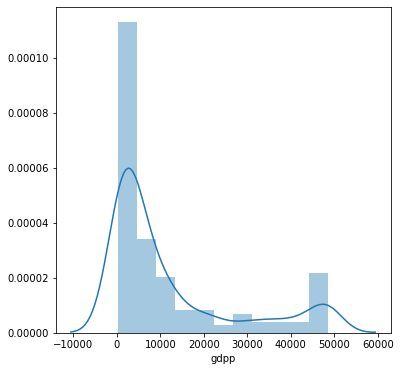

In [23]:
# function to plot distplot for all numeric columns 
for col in num_Cols:
    plt.figure(figsize=(6,6))
    sns.distplot(df_Country[col])
    plt.show()

**Obsevations:**
- child_mort is right skewed and we can clearly observe that most countries have cild_mort approximately in between range  0-40 while other countries have more that 50 child_mort.<br>
**- For child_mort we can observe that there is grouping of countries, having child_mort very less (<40) and having child_mort very high(>60).** 
- exports and imports columns are right skewed and most countries have exports and imports approximately in between range 0-20000 while other countries have more than 20000 units of exports and imports.
- income is right skewed and we can obsereve that most of the countries have income less than 20000 per person.<br>
**- For income we can observe that there is grouping of countries having income approximately in between range 0-10000 , 10000-20000 and more than 30000.**
- health is right skewed and we can observe that for most  countries total spending on health is less than approximately 1800.
- inflation is almost normally distributed approximately in between range 0-20.
- life_expec is left skewed with most countries having life expectancy between range approximately 52-80.
- For total_fer we can observe two peaks at appximately 1-3 and 5. 
- gdpp is right skewed whith most countries having gdpp less than approximately 10000.<br>
**- For gdpp we can observe that there is grouping of countries having gdpp approximately in between range 0-5000 , 10000-22000 and more than 30000.**


## Bivariate Analysis

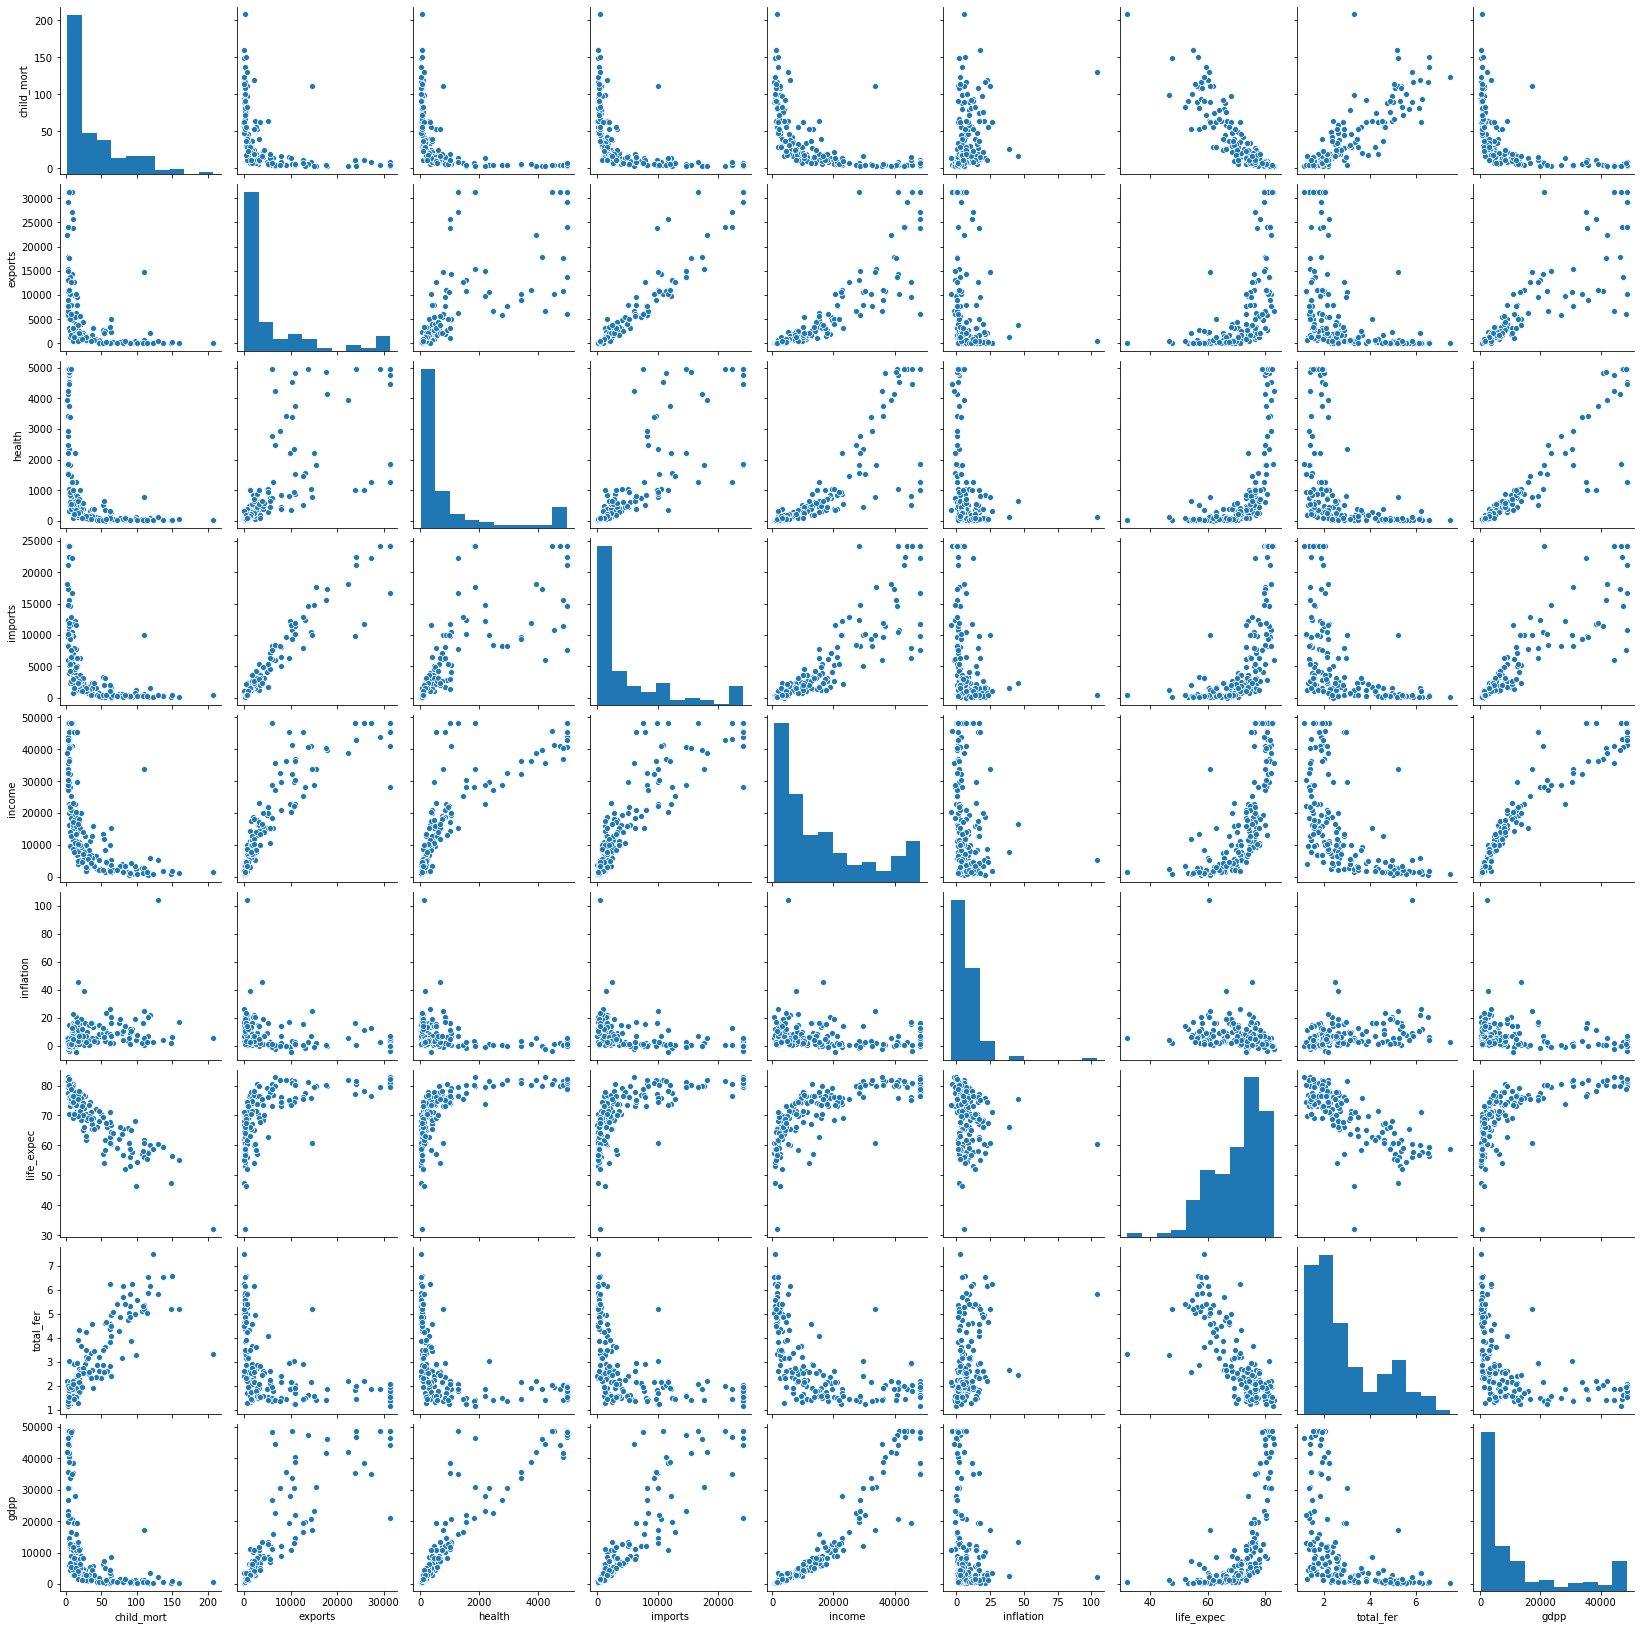

In [24]:
# plotting pairplot for all numeric columns
sns.pairplot(df_Country[num_Cols])
plt.show()

 **Obsevations:**<br>
- income and gdpp shows almost linear behaviour which is as expected.
- As the gdpp of a country is increasing the child_mort is decreasing. 
- spending on health is approximately in between range 0-2000 for countries having gdpp less than 10000. 
- we can observe that countries having high income per person has low child_mort i.e low death rate of children 
- we can also observe that there is one data point having comparitively high income and high child_mort
- we can also observe that there is one data point having comparitively high child_mort.

In [25]:
# let's check datapoint having high income and high child_mort
df_Country[(df_Country.child_mort > 100) & (df_Country.income > 20000)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
49,Equatorial Guinea,111.0,14671.8,766.08,10071.9,33700.0,24.9,60.9,5.21,17100


**Obsevations:**<br>
- From an online report it was found that :<br>
In Equatorial Guinea due to inadequate sanitation and unhygienic conditions has contributed to increased infant mortality, as 20 percent of children die before the age of 5. Equatorial Guinea is also considered the least prepared country for an epidemic, mainly due to its inability to prevent pathogens and toxins.
<br>
- so datapoint cannot be treated as an outlier and is important for our analysis. 

In [26]:
# let's check datapoint having high child_mort
df_Country[df_Country.child_mort > 150]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.29,45.74,428.31,1500.0,5.45,32.1,3.33,662
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399


**Obsevations:**<br>
- From an online report it was found that:<br>

- Haiti reveal a domino-effect of massive natural disasters, fragile health care infrastructure and low access to preventative care in a country where half of the population lives in extreme poverty.

- Also,Sierra Leone has long struggled with some of the world's worst health outcomes—including a maternal mortality epidemic in which a woman's lifetime risk of dying in pregnancy or childbirth is 1 in 20. Extreme poverty prevents most families from accessing health care.
<br>
- Thus High child_mort can be expected for these datapoints so these datapoint can not be treated as an outlier and are important for our ananlysis. 

## Multivariate Analysis

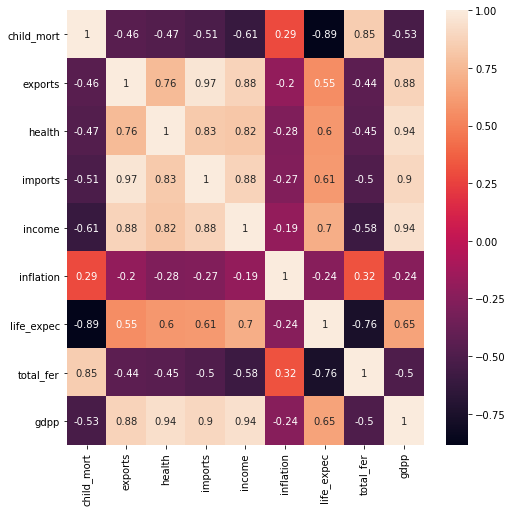

In [27]:
# Plotting heatmap to check correlations between the features
plt.figure(figsize = (8,8))
sns.heatmap(df_Country.corr() , annot = True)
plt.show()

**Obsevations:**<br>
- high positive correlation between child_mort and total_fer (0.85)
- high positive correlation between gdpp and income (0.94)
- good positive correlation between income and life_expec (0.7)
- good positive correlation between income and exports
- high positive correlation between imports and exports

- high negative correlation between life_expec and child_mort (-0.89)
- high negative correlation between life_expec and total_fer (-0.76)
- good negative correlation between child_mort and gdpp (-0.53)
- good negative correlation between child_mort and income (-0.61)

# 4. Checking Cluster tendency of the dataset  

## Hopkins Statistics

In [28]:
# dataframe of all numeric cloumns for Hopkins Test.
df_Country_Cluster = df_Country[num_Cols]

In [29]:
df_Country_Cluster.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553
1,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090
2,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460
3,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530
4,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200


In [30]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
# Use the Hopkins Statistic function by passing the above dataframe as a paramter
hop_score_list=[]
for i in range (10):
    hop_score=hopkins(df_Country_Cluster)
    hop_score_list.append(hop_score)

In [32]:
# Hopkins Score list
hop_score_list

[0.9023972312361717,
 0.8525911507628462,
 0.8707103648798488,
 0.9297971930763567,
 0.8029468011948283,
 0.8889753806431503,
 0.8323736366231166,
 0.8831114332830435,
 0.8794141849877761,
 0.8568124748254353]

In [33]:
# finding average Hopkins score 
print('Average Hopkins Score is :',round(sum(hop_score_list)/len(hop_score_list),2))

Average Hopkins Score is : 0.87


**Observations:**<br>
- As the Hopkins score in near to 1 it tends to indicate that the data has high cluster tendency . 

# 5. Data Preparation

## Rescaling

In [34]:
# scaling the features
scaler = StandardScaler()
df_Country_Scaled = scaler.fit_transform(df_Country_Cluster)

In [35]:
df_Country_Scaled

array([[ 1.29153238, -0.66958102, -0.62943361, ..., -1.61909203,
         1.90288227, -0.75736169],
       [-0.5389489 , -0.54217181, -0.47348516, ...,  0.64786643,
        -0.85997281, -0.52332107],
       [-0.27283273, -0.47583812, -0.53001803, ...,  0.67042323,
        -0.0384044 , -0.49883845],
       ...,
       [-0.37231541, -0.56578559, -0.59652972, ...,  0.28695762,
        -0.66120626, -0.70727157],
       [ 0.44841668, -0.63010392, -0.61153246, ..., -0.34463279,
         1.14094382, -0.70727157],
       [ 1.11495062, -0.61289626, -0.59902097, ..., -2.09278484,
         1.6246091 , -0.69734618]])

In [36]:
# converting the scaled array to dataframe
df_Country_Scaled = pd.DataFrame(df_Country_Scaled)

In [37]:
# Naming the columns
df_Country_Scaled.columns = num_Cols

In [38]:
df_Country_Scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629434,-0.732728,-0.958349,0.157336,-1.619092,1.902882,-0.757362
1,-0.538949,-0.542172,-0.473485,-0.472182,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
2,-0.272833,-0.475838,-0.530018,-0.560152,-0.192552,0.789274,0.670423,-0.038404,-0.498838
3,2.007808,-0.418960,-0.588939,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.704258,-0.541946,0.013312


# 6. Modelling 

## Modelling using K-Means Clustering Technique

### Finding the optimal number of clusters using Elbow Curve and Silhouette Score

In [39]:
# function to find SSD and silhouette score of the models with different cluster numbers
ssd = []
silhoutte_avg = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,random_state=100,max_iter=50)
    kmeans.fit(df_Country_Scaled)
    
    # append ssd for each cluster
    ssd.append(kmeans.inertia_)
    
    # silhouette score
    cluster_labels = kmeans.labels_
    silhoutte_avg.append(silhouette_score(df_Country_Scaled,cluster_labels))

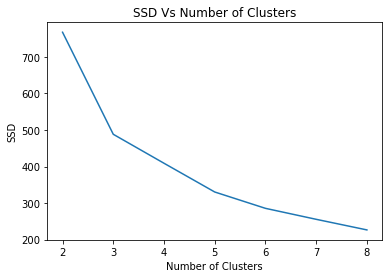

In [40]:
# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.title('SSD Vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.xticks(np.arange(7), range_n_clusters)
plt.show()

**Observations:**<br>
- Form the Elbow curve we can observe that after Number of Clusters = 3  the curve neutralises gradually.
- Thus, from Elbow curve we can conclude that we can have 3 clusters.
- We can also check groupings with 5 clusters as we can also observe a gradual drop there.

In [41]:
# Silhouette Analysis
i=0
for num_clusters in range_n_clusters:
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhoutte_avg[i]))
    i+=1

For n_clusters=2, the silhouette score is 0.4937743539705206
For n_clusters=3, the silhouette score is 0.43488765509351196
For n_clusters=4, the silhouette score is 0.4344775067809008
For n_clusters=5, the silhouette score is 0.4086759100222278
For n_clusters=6, the silhouette score is 0.31015144080089385
For n_clusters=7, the silhouette score is 0.3057382325248149
For n_clusters=8, the silhouette score is 0.3172934800606674


**Observations:**<br>
- From Silhoutte score we can observe a peak for 2 clusters but from our business prospective 2 clusters will not sufficiently  classify different country into dissimilar groups.Thus, we can check the next best value.
- As after 3 clusters we can observe that silhouette score is gradually decreasing.
- Thus, from Silhouette Analysis we can conclude that we can have 3 clusters.

### KMeans model with 5 clusters

In [42]:
# checking the model with 5 clusters
kmeans = KMeans(n_clusters=5,max_iter=50,random_state=100)
kmeans.fit(df_Country_Scaled)

KMeans(max_iter=50, n_clusters=5, random_state=100)

In [43]:
# checking the labels array
kmeans.labels_

array([4, 2, 2, 4, 2, 2, 2, 0, 3, 2, 0, 0, 2, 2, 2, 3, 2, 4, 2, 2, 2, 2,
       2, 0, 2, 4, 4, 2, 4, 3, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 0, 0,
       3, 2, 2, 2, 2, 4, 4, 0, 2, 3, 0, 4, 4, 2, 3, 4, 0, 2, 2, 4, 4, 2,
       4, 0, 3, 2, 2, 2, 2, 3, 0, 0, 2, 0, 2, 2, 4, 4, 0, 2, 4, 2, 2, 4,
       4, 2, 2, 3, 2, 4, 4, 2, 2, 4, 3, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       3, 0, 4, 1, 3, 0, 4, 2, 2, 2, 2, 2, 0, 3, 2, 2, 4, 2, 0, 4, 2, 2,
       4, 3, 0, 0, 4, 4, 0, 0, 2, 2, 4, 2, 3, 3, 2, 4, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 3, 0, 0, 2, 2, 2, 2, 2, 4, 4])

In [44]:
df_Country['kmeans_label5'] = kmeans.labels_  

In [45]:
# Checking lables assigned
df_Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_label5
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,4
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,2


### Visualisations on the clusters with Kmeans labels with 5 clusters

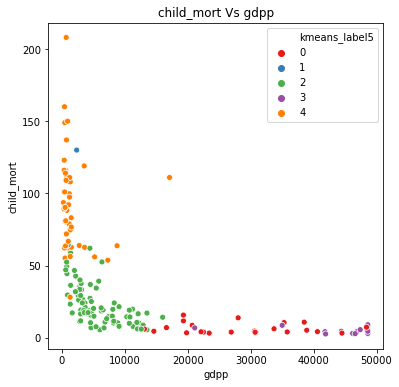

In [46]:
plt.figure(figsize=(6,6))
plt.title('child_mort Vs gdpp')
sns.scatterplot(x='gdpp', y='child_mort', hue='kmeans_label5', data=df_Country, palette='Set1')
plt.show()

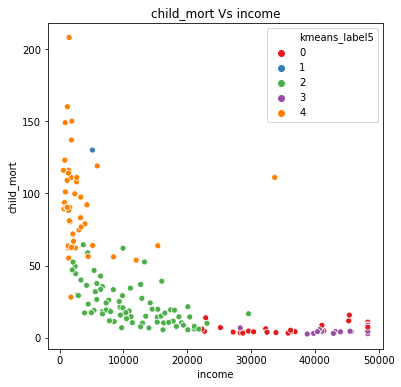

In [47]:
plt.figure(figsize=(6,6))
plt.title('child_mort Vs income')
sns.scatterplot(x='income', y='child_mort', hue='kmeans_label5', data=df_Country, palette='Set1')
plt.show()

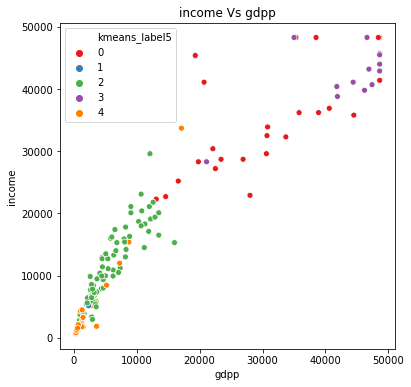

In [48]:
plt.figure(figsize=(6,6))
plt.title('income Vs gdpp')
sns.scatterplot(x='gdpp', y='income', hue='kmeans_label5', data=df_Country, palette='Set1')
plt.show()

**Observations:**
- From the scatterplots We can observe that many datapoints of clusters are overlapping. 

## Cluster Profiling with 5 clusters

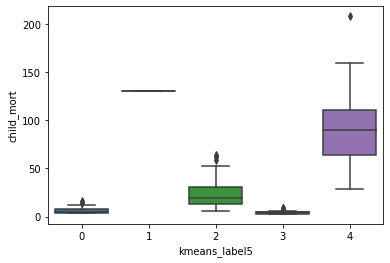

In [49]:
# box plot for gdpp of each cluster
sns.boxplot(x='kmeans_label5',y='child_mort',data=df_Country)

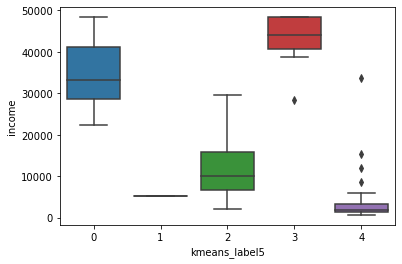

In [50]:
# box plot for gdpp of each cluster
sns.boxplot(x='kmeans_label5',y='income',data=df_Country)

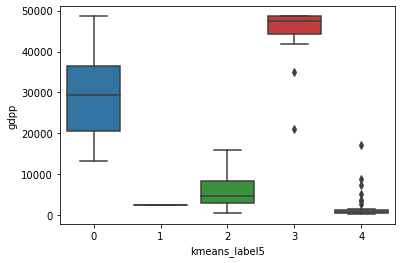

In [51]:
# box plot for gdpp of each cluster
sns.boxplot(x='kmeans_label5',y='gdpp',data=df_Country)

**Conclusion:**<br>
<br>From The above scatter plots, boxplots and mean of all features for all labels we can not clearly summarize the behaviour of each cluster as there are very few datapoints for cluster label 1 and datapoints are overlapping.  


### Final KMeans model with 3 clusters

In [52]:
# kmeans with 3 clusters
kmeans = KMeans(n_clusters=3,max_iter=50,random_state=100)
kmeans.fit(df_Country_Scaled)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [53]:
# checking the labels array
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [54]:
# Assigning the labels to each country
df_Country['kmeans_label'] = kmeans.labels_  

In [55]:
# Checking lables assigned
df_Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_label5,kmeans_label
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,4,2
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,4,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,2,0


### Visualisations on the clusters with Kmeans labels with 3 clusters

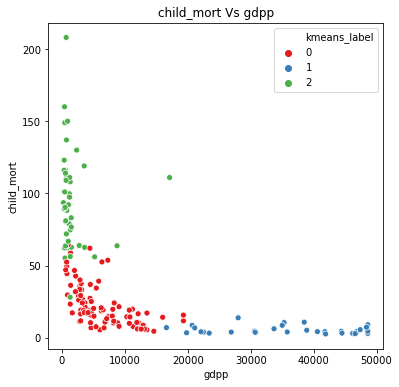

In [56]:
plt.figure(figsize=(6,6))
plt.title('child_mort Vs gdpp')
sns.scatterplot(x='gdpp', y='child_mort', hue='kmeans_label', data=df_Country, palette='Set1')
plt.show()

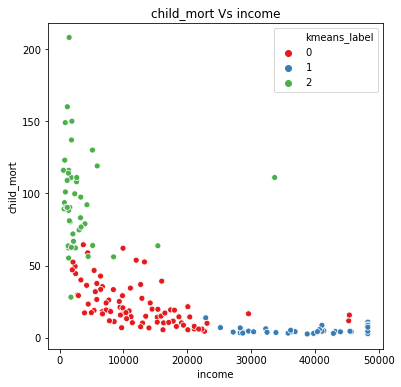

In [57]:
plt.figure(figsize=(6,6))
plt.title('child_mort Vs income')
sns.scatterplot(x='income', y='child_mort', hue='kmeans_label', data=df_Country, palette='Set1')
plt.show()

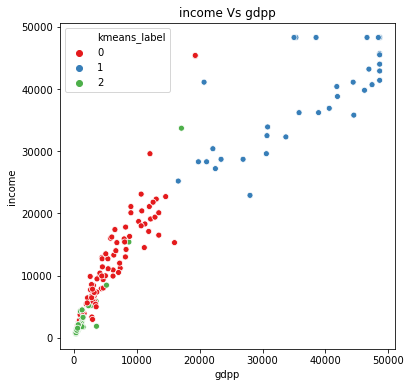

In [58]:
plt.figure(figsize=(6,6))
plt.title('income Vs gdpp')
sns.scatterplot(x='gdpp', y='income', hue='kmeans_label', data=df_Country, palette='Set1')
plt.show()

**Observations:**
- From the the scatter plots we can clearly observe three clusters with suffient number of datapoints in each cluster. 

## Cluster Profiling with 3 clusters

In [59]:
# checking the mean gdpp of each cluster
df_Country.groupby('kmeans_label')['gdpp'].mean()

kmeans_label
0     6278.847059
1    37745.675676
2     1633.600000
Name: gdpp, dtype: float64

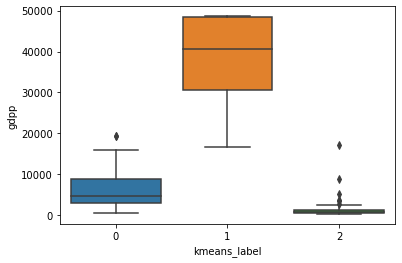

In [60]:
# box plot for gdpp of each cluster
sns.boxplot(x='kmeans_label',y='gdpp',data=df_Country)

**Observations:**
- Data spread is not overlapping for any cluster.
- Medians are not near.
- For Cluster 2 data is much squeezed below 50000.Also,this cluster have the lowest gdpp.
- Cluster 0 is having data spread between 0 to 10000 with meadin approximately at 5000.
- Cluster 1 is clearly having highest gpdd with meadin approximately at 40000.

In [61]:
# checking the mean income of each cluster
df_Country.groupby('kmeans_label')['income'].mean()

kmeans_label
0    12317.529412
1    38711.081081
2     3312.733333
Name: income, dtype: float64

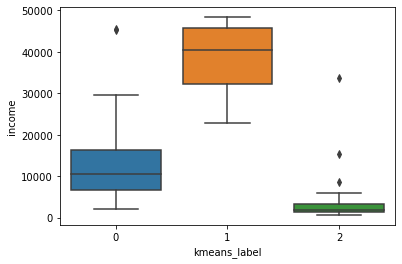

In [62]:
# box plot for income of each cluster
sns.boxplot(x='kmeans_label',y='income',data=df_Country)

**Observations:**
- Data spread is not overlapping for any cluster.
- Medians are not near.
- For Cluster 2 data is much squeezed.Also,this cluster have the lowest income.
- Cluster 0 is having data spread approximately between 8000 to 18000 and meadin approximately at 10000.
- Cluster 1 is clearly having highest income with meadin approximately at 40000.

In [63]:
# checking the mean child_mort of each cluster
df_Country.groupby('kmeans_label')['child_mort'].mean()

kmeans_label
0    22.860000
1     5.237838
2    94.537778
Name: child_mort, dtype: float64

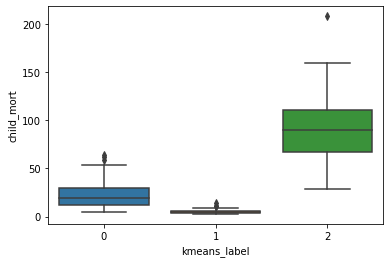

In [64]:
# box plot for child_mort of each cluster
sns.boxplot(x='kmeans_label',y='child_mort',data=df_Country)

**Observations:**
- Data spread is not overlapping for any cluster.
- Medians are not near.
- For Cluster 1 data is much squeezed near 0 .Also,this cluster have the lowest child_mort i.e. child deaths.
- Cluster 0 is having data spread approximately between 10 to 45 and meadin approximately at 30.
- Cluster 2 is clearly having highest child_mort with meadin approximately at 90.

**Conclusion:**<br>
<br>From The above boxplots and mean of all features for all labels we may summarize behaviour of each cluster as follows: <br> 
- label 0 : mid gdpp , mid income , mid child_mort
- label 1 : high gdpp , high income , low child_mort
- label 2 : low gdpp , low income , high child_mort
<br>
- As cluster with label 2 has lowest gdpp , lowest income and high death rate of child below 5 years of age,we should focus on countries with label 2 

### Identifying countries with direst need of funds based on Kmeans model with 3 clusters. 

In [65]:
# dataframe of countries having label 2 which are most affected countries 
df_Mostneed = df_Country[df_Country.kmeans_label == 2]

In [66]:
# checking top 10 countries having lowest gdpp
cnt1 = df_Mostneed.sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True]).head(10)

In [67]:
cnt1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_label5,kmeans_label
26,Burundi,93.6,20.61,26.80,90.55,764.0,12.30,57.7,6.26,231,4,2
88,Liberia,89.3,62.46,38.59,302.80,700.0,5.47,60.8,5.02,327,4,2
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609.0,20.80,57.5,6.54,334,4,2
112,Niger,123.0,77.26,17.96,170.87,814.0,2.55,58.8,7.49,348,4,2
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399,4,2
93,Madagascar,62.2,103.25,15.57,177.59,1390.0,8.79,60.8,4.60,413,4,2
106,Mozambique,101.0,131.99,21.83,193.58,918.0,7.64,54.5,5.56,419,4,2
31,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.01,47.5,5.21,446,4,2
94,Malawi,90.5,104.65,30.25,160.19,1030.0,12.10,53.1,5.31,459,4,2
50,Eritrea,55.2,23.09,12.82,112.31,1420.0,11.60,61.7,4.61,482,4,2


In [68]:
# list of top 10 countries
list1 = list(cnt1['country'].head(10))

In [69]:
list1

['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea']

In [70]:
# checking top 5 countries having highest child deaths
cnt2 = df_Mostneed.sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head()

In [71]:
cnt2.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_label5,kmeans_label
66,Haiti,208.0,101.29,45.74,428.31,1500.0,5.45,32.1,3.33,662,4,2
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399,4,2
32,Chad,150.0,330.10,40.63,390.20,1930.0,6.39,56.5,6.59,897,4,2
31,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.01,47.5,5.21,446,4,2
97,Mali,137.0,161.42,35.26,248.51,1870.0,4.37,59.5,6.55,708,4,2


In [72]:
# list of countries
list2 = list(cnt2['country'])

In [73]:
list2

['Haiti', 'Sierra Leone', 'Chad', 'Central African Republic', 'Mali']

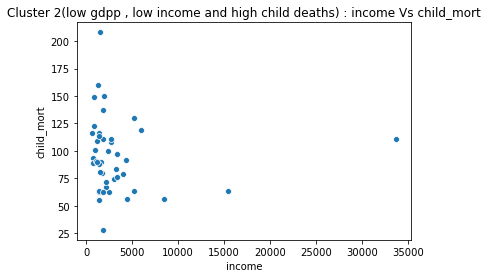

In [74]:
# scatter plot
sns.scatterplot(x='income',y='child_mort',data=df_Mostneed)
plt.title('Cluster 2(low gdpp , low income and high child deaths) : income Vs child_mort')
plt.show()

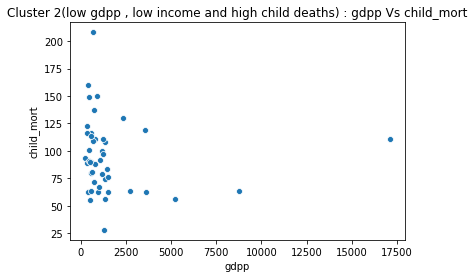

In [75]:
# scatter plot
sns.scatterplot(x='gdpp',y='child_mort',data=df_Mostneed)
plt.title('Cluster 2(low gdpp , low income and high child deaths) : gdpp Vs child_mort')
plt.show()

In [76]:
# dataframe of countries having label 0
df_Cluster0 = df_Country[df_Country.kmeans_label == 0]

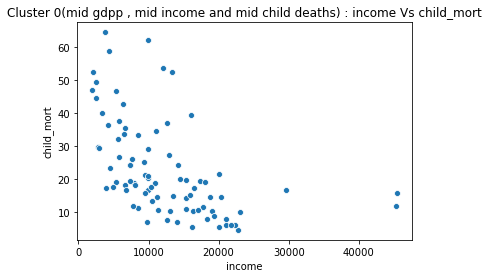

In [77]:
# scatter plot
sns.scatterplot(x='income',y='child_mort',data=df_Cluster0)
plt.title('Cluster 0(mid gdpp , mid income and mid child deaths) : income Vs child_mort')
plt.show()

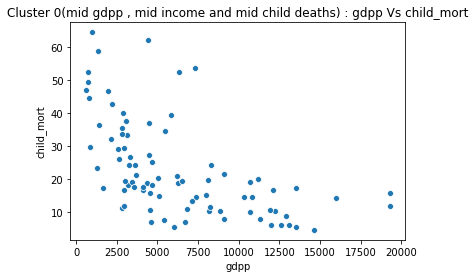

In [78]:
# scatter plot
sns.scatterplot(x='gdpp',y='child_mort',data=df_Cluster0)
plt.title('Cluster 0(mid gdpp , mid income and mid child deaths) : gdpp Vs child_mort')
plt.show()

In [79]:
# dataframe of countries having label 1
df_Cluster1 = df_Country[df_Country.kmeans_label == 1]

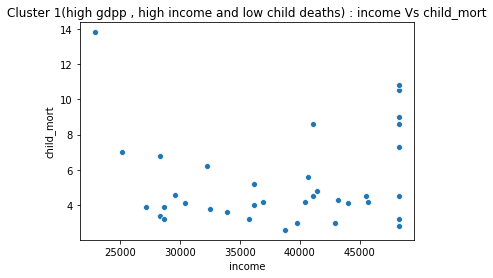

In [80]:
# scatter plot
sns.scatterplot(x='income',y='child_mort',data=df_Cluster1)
plt.title('Cluster 1(high gdpp , high income and low child deaths) : income Vs child_mort')
plt.show()

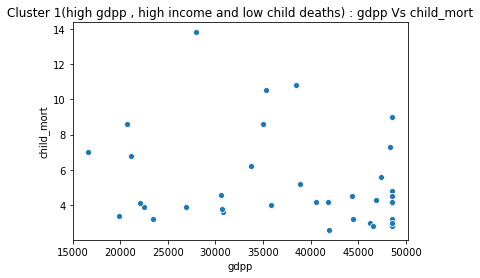

In [81]:
# scatter plot
sns.scatterplot(x='gdpp',y='child_mort',data=df_Cluster1)
plt.title('Cluster 1(high gdpp , high income and low child deaths) : gdpp Vs child_mort')
plt.show()

## Modelling using Hierarchical Clustering Technique 

In [82]:
df_Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_label5,kmeans_label
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,4,2
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,4,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,2,0


In [83]:
# checking scaled array
df_Country_Scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629434,-0.732728,-0.958349,0.157336,-1.619092,1.902882,-0.757362
1,-0.538949,-0.542172,-0.473485,-0.472182,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
2,-0.272833,-0.475838,-0.530018,-0.560152,-0.192552,0.789274,0.670423,-0.038404,-0.498838
3,2.007808,-0.418960,-0.588939,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.704258,-0.541946,0.013312
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.514254,-0.550755,-0.535475,-0.867457,-0.489784,-0.852161,0.365754,-0.597431
163,-0.526514,-0.226273,-0.200931,-0.414026,0.051635,3.616865,0.546361,-0.316678,0.099332
164,-0.372315,-0.565786,-0.596530,-0.612551,-0.763000,0.409732,0.286958,-0.661206,-0.707272
165,0.448417,-0.630104,-0.611532,-0.702420,-0.763678,1.500916,-0.344633,1.140944,-0.707272


### Hierarchical clustering with single linkage

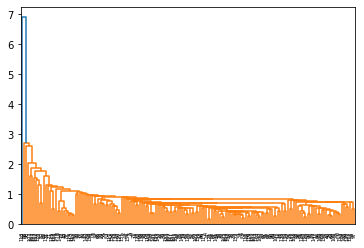

<Figure size 576x576 with 0 Axes>

In [84]:
# intantiate 
mergings = linkage(df_Country_Scaled, method="single", metric='euclidean')

#dendogram for single linkage
dendrogram(mergings)

plt.figure(figsize = (8,8))
plt.show()

**Observations:**
- By using single linkage technique we can not observe any clear clusters formed.

### Hierarchical clustering with complete linkage

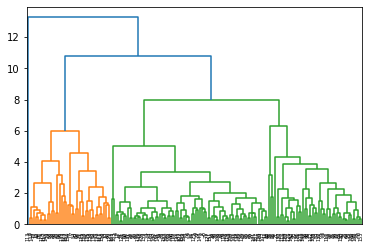

<Figure size 720x720 with 0 Axes>

In [85]:
# intantiate 
mergings = linkage(df_Country_Scaled, method="complete", metric='euclidean')

#dendogram for single linkage
dendrogram(mergings)

plt.figure(figsize = (10,10))
plt.show()

**Observations:**
- By using Complete linkage technique we can observe clusters formed clearly.

In [86]:
# Cutting dendrogram for 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [87]:
df_Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_label5,kmeans_label
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,4,2
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,4,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,2,0


In [88]:
# Assigning cluster labels 
df_Country['hierarchical_label'] = cluster_labels
df_Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_label5,kmeans_label,hierarchical_label
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,4,2,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,2,0,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,2,0,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530,4,2,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,2,0,0


### Visualisations on the clusters with Hierarchical clustering

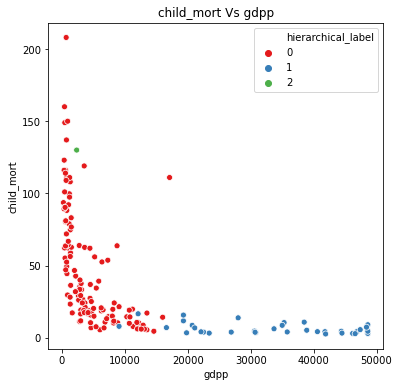

In [89]:
plt.figure(figsize=(6,6))
plt.title('child_mort Vs gdpp')
sns.scatterplot(x='gdpp', y='child_mort', hue='hierarchical_label', data=df_Country, palette='Set1')
plt.show()

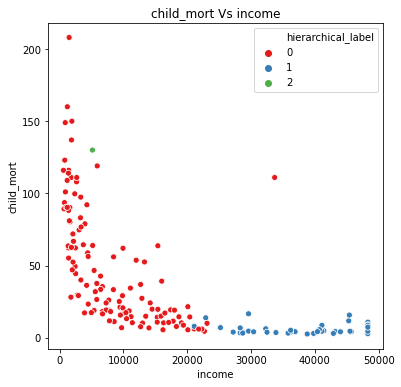

In [90]:
plt.figure(figsize=(6,6))
plt.title('child_mort Vs income')
sns.scatterplot(x='income', y='child_mort', hue='hierarchical_label', data=df_Country, palette='Set1')
plt.show()

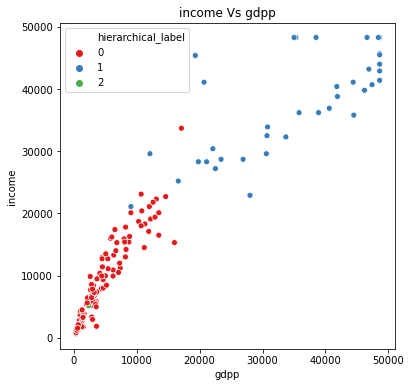

In [91]:
plt.figure(figsize=(6,6))
plt.title('income Vs gdpp')
sns.scatterplot(x='gdpp', y='income', hue='hierarchical_label', data=df_Country, palette='Set1')
plt.show()

### Cluster Profiling

In [92]:
# checking the mean child_mort of each cluster
df_Country.groupby('hierarchical_label')['child_mort'].mean()

hierarchical_label
0     48.123200
1      5.992683
2    130.000000
Name: child_mort, dtype: float64

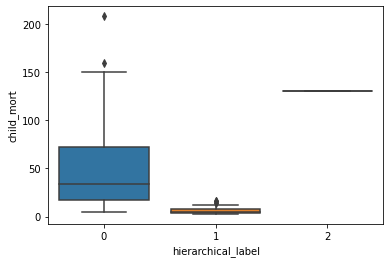

In [93]:
# box plot for child_mort of each cluster
sns.boxplot(x='hierarchical_label',y='child_mort',data=df_Country)

**Observations:**
- Data spread is not overlapping for any cluster.
- Medians are not near.
- For Cluster 2 data is much squeezed at 140 approximately .Also,this cluster have the highest child_mort.
- Cluster 0 is having data spread is approximately between 20 to 70 with median approximately at 40.
- For Cluster 1 data is squeezed approximately between  0 and 20.

In [94]:
# checking the mean gdpp of each cluster
df_Country.groupby('hierarchical_label')['gdpp'].mean()

hierarchical_label
0     4360.91200
1    35520.97561
2     2330.00000
Name: gdpp, dtype: float64

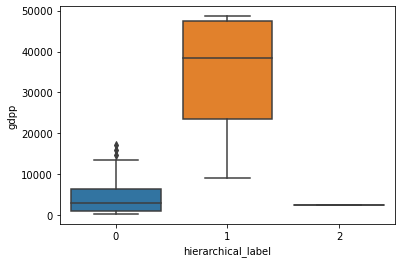

In [95]:
# box plot for gdpp of each cluster
sns.boxplot(x='hierarchical_label',y='gdpp',data=df_Country)

**Observations:**
- Data spread is not overlapping for any cluster.
- Medians of cluster 0 and cluster 2 are almost near 3000.
- For Cluster 2 data is much squeezed below 10000.
- Cluster 0 is having data spread approximately between 10 to 7000 with median approximately at 3000.
- Cluster 1 is clearly having highest gdpp with median approximately at 40000.

In [96]:
# checking the mean income of each cluster
df_Country.groupby('hierarchical_label')['income'].mean()

hierarchical_label
0     8396.104000
1    38383.170732
2     5150.000000
Name: income, dtype: float64

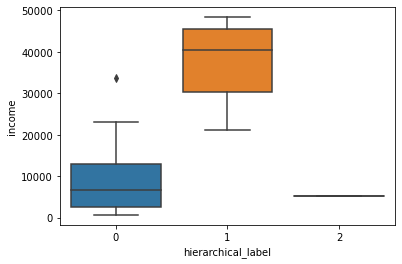

In [97]:
# box plot for gdpp of each cluster
sns.boxplot(x='hierarchical_label',y='income',data=df_Country)

**Observations:**<br>
- Data spread is not overlapping for any cluster.
- Medians of cluster 0 and cluster 2 are almost near 7000.
- For Cluster 2 data is much squeezed below 10000.
- Cluster 0 is having data spread approximately between 20 to 13000 with median approximately at 7000.
- Cluster 1 is clearly having highest income with median approximately at 40000.


**Conclusion:**<br>
<br>From The above boxplots and averages of all features for all labels we may summaries behaviour of each cluster as follows: <br> 
- label 0 : low gdpp , low income , mid child_mort
- label 1 : highest gdpp , highest income , lowestt child_mort
- label 2 : low gdpp , low income , highest child_mort
<br>
- As cluster with label 2 has low gdpp , low income and highest death rate of child below 5 years of age,we should focus on countries with label 2 

In [98]:
# dataframe of countries having label 2 which are most affected countries 
df_Mostneed1 = df_Country[df_Country.hierarchical_label == 2]

In [99]:
# checking top 5 countries having lowest gdpp
df_Mostneed1.sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_label5,kmeans_label,hierarchical_label
113,Nigeria,130.0,589.49,118.13,405.42,5150.0,104.0,60.5,5.84,2330,1,2,2


In [100]:
# checking top 5 countries having highest child deaths
df_Mostneed1.sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_label5,kmeans_label,hierarchical_label
113,Nigeria,130.0,589.49,118.13,405.42,5150.0,104.0,60.5,5.84,2330,1,2,2


In [101]:
df_Country['kmeans_label'].value_counts()

0    85
2    45
1    37
Name: kmeans_label, dtype: int64

In [102]:
df_Country['hierarchical_label'].value_counts()

0    125
1     41
2      1
Name: hierarchical_label, dtype: int64